# implement the whole algorithm

In [24]:
#import the liberaries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [25]:
#function that calculates the distance (Euclidean distance)
def dist_L2(test, data):
   return np.sqrt(np.sum( (test - data)**2 ))

#### Now we can easily implement the whole algorithm

In [26]:
#main Function
def predict(test,x_train,y_train,k):
    
    #start calculating the distance for each row in the X_train from the X_test
    
    #create an empty list called distances to store all of the calculated distances
    distances =[]
    #iterate for each row in the trained data to calculate the distances and store them in distances array
    for i in range(len(x_train)):
        distances.append(dist_L2(test, x_train.loc[i]))
    
    #np.argsort sorts your list in ascending order but return the index of these sorted values
    #In other words Returns the indices that would sort an array
    k_index = np.argsort(distances)
    pred = k_index[:k]
    
    #Having the index of the knn we can obtain their class from the Y column
    
    #create an empty list that will contain the classes of the shortest k distances
    y_predict =[]
    for i in pred:
       y_predict.append(y_train.loc[i])

    #This line checks which class is repeated the most and returns it with its frequency 
    #return Counter(labels).most_common(1)
    return c(y_predict).most_common(1)[0][0]



In [27]:
#read the data
cancer_data = pd.read_csv('Breast-Cancer Data.csv').sample(frac=1).reset_index(drop=True)
#show first 4 rows in the excel sheet
cancer_data.head(4)

,texture_mean,area_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst,diagnosis
0,-0.109290,1.456496,0.892395,1.817982,0.041553,-0.233566,0.346806,0.602911,-0.584350,-0.005862,-0.408313,-0.220862,0.590885,M
1,1.042608,-0.184551,-1.133686,-0.657209,-0.140994,-1.206042,-0.290029,-0.008956,-0.896696,-0.279996,0.658389,-0.267766,-0.384637,B
2,-2.229249,-0.845521,-0.029909,-0.823838,-1.572164,0.170451,-1.470441,-0.634905,0.256017,-1.046599,-0.968906,-0.633535,-1.311625,B
3,-0.670114,-0.506788,-0.086842,-0.011843,0.987147,1.481735,-0.017878,-0.223253,0.064343,2.500278,1.426026,2.205998,0.534263,B


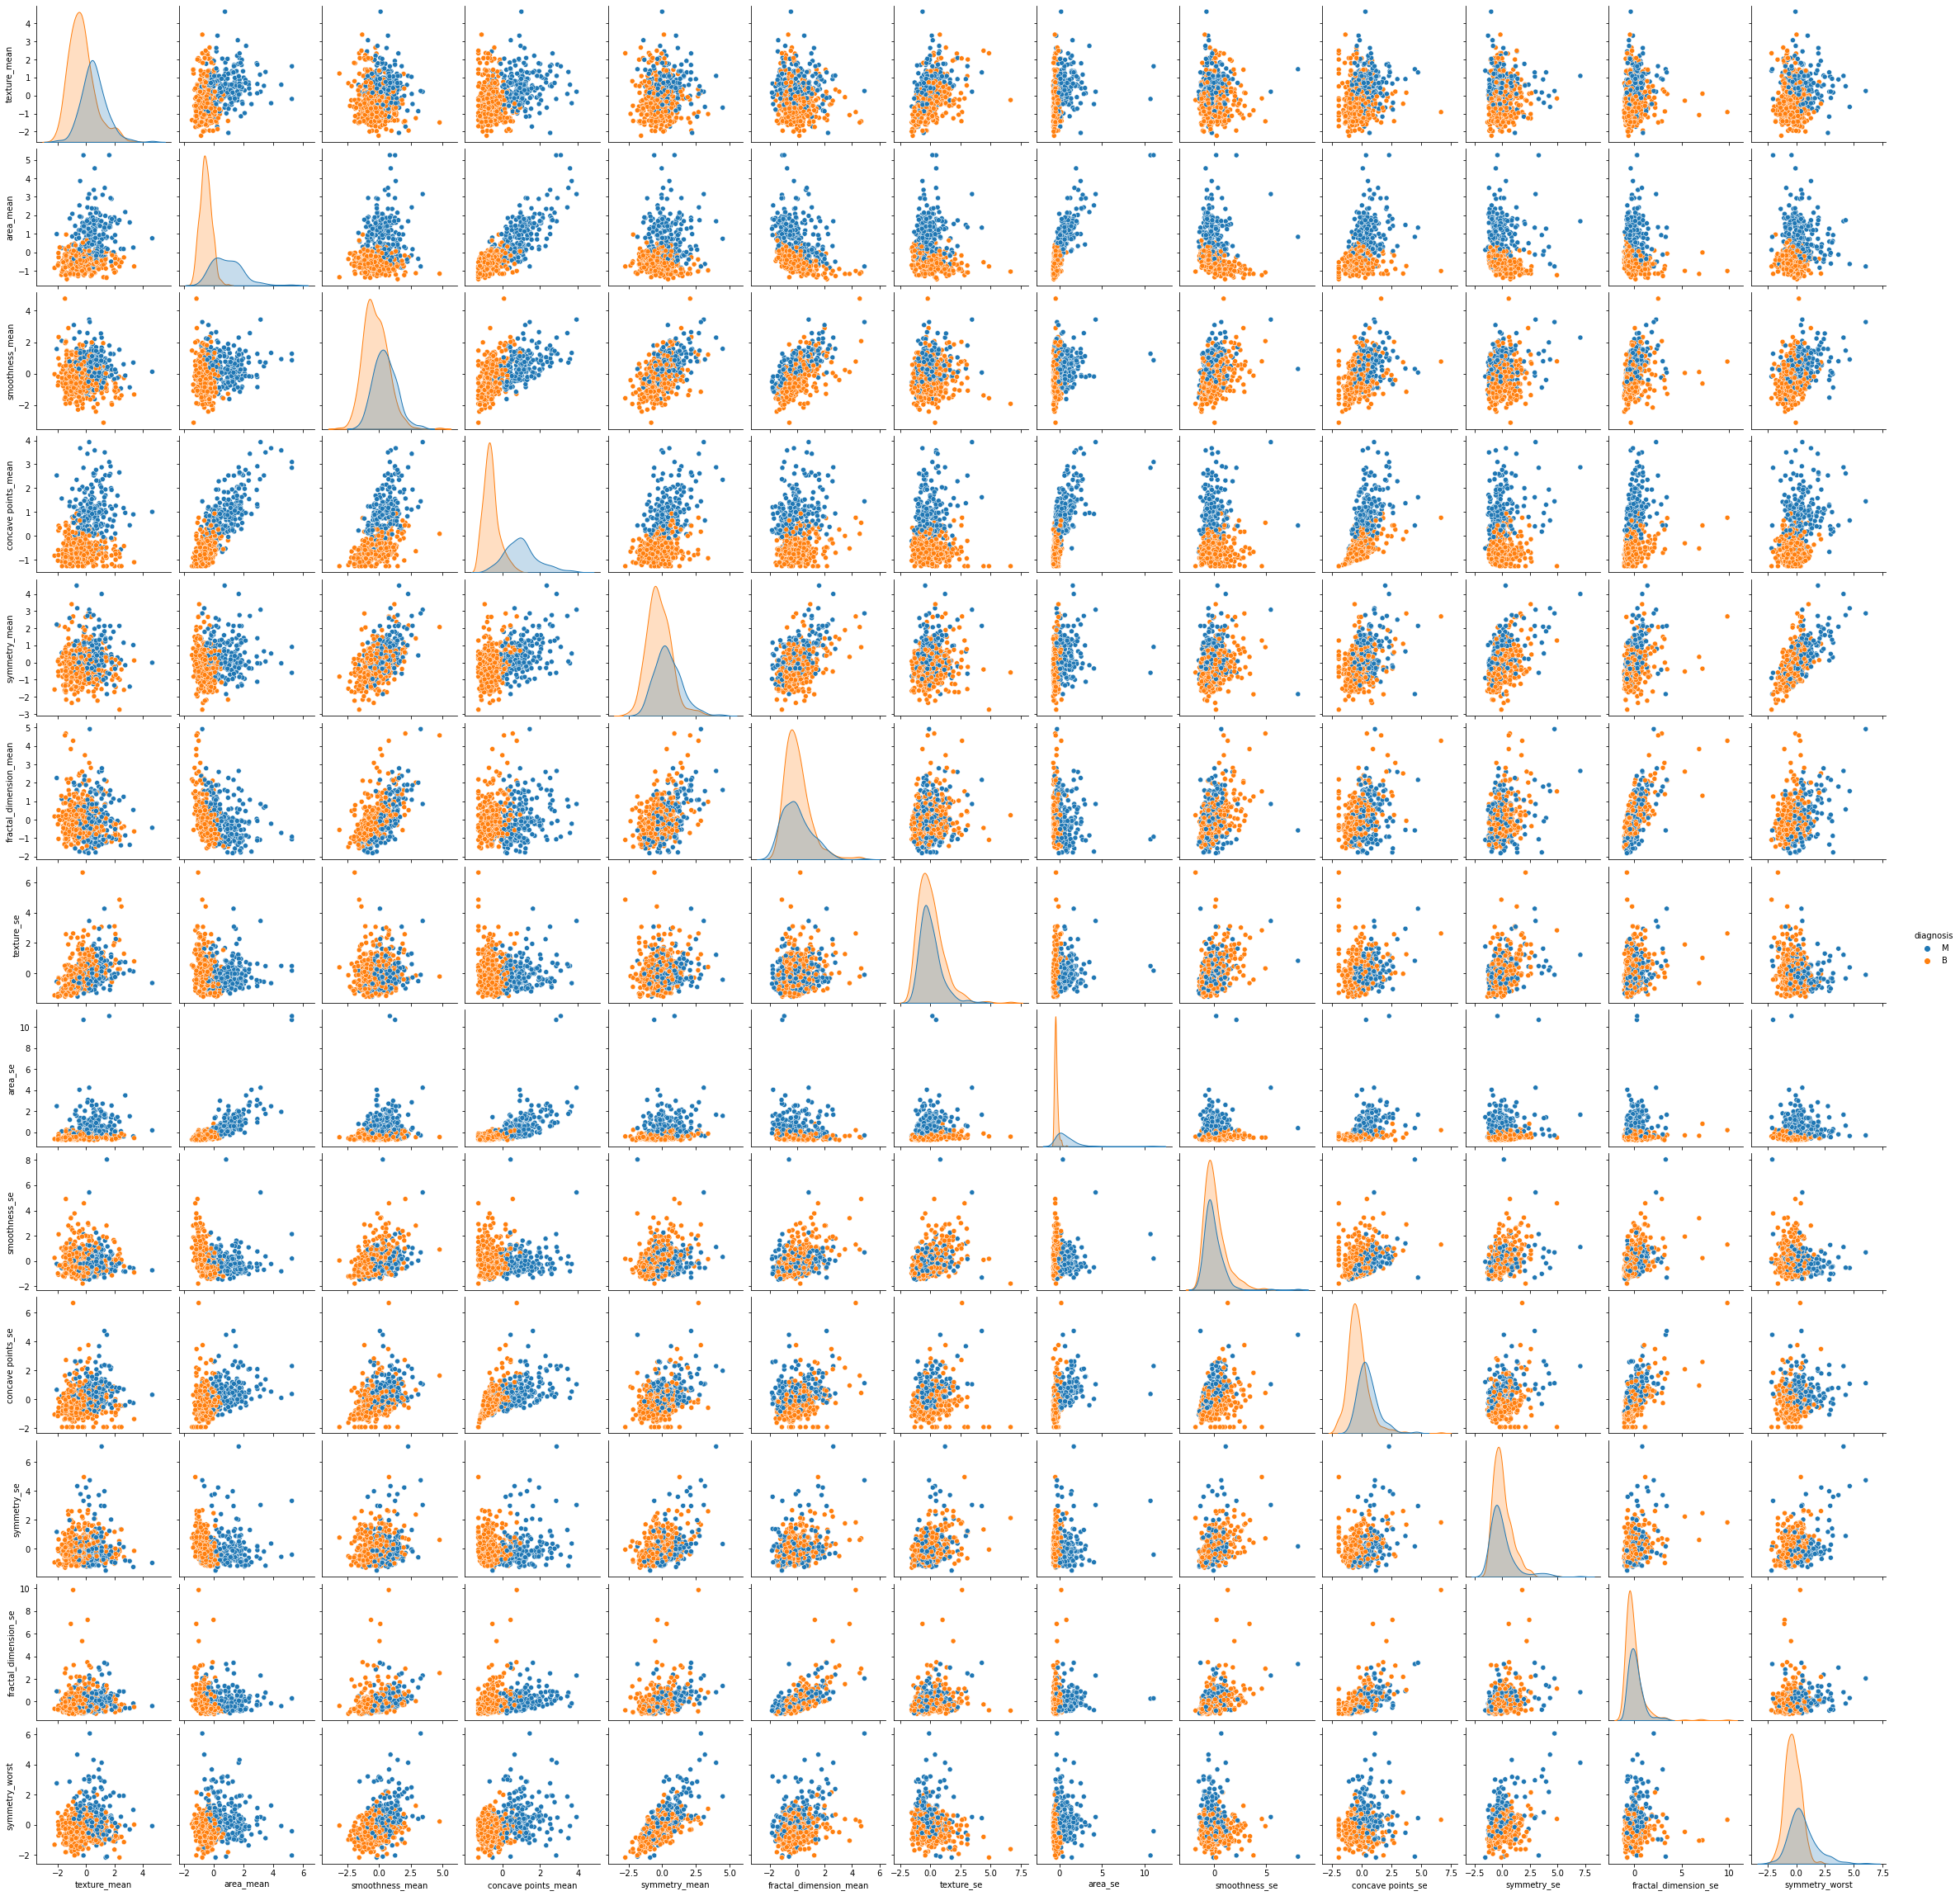

In [28]:
#visualizing the data
sns.pairplot(data=cancer_data,hue="diagnosis")
#fractual dim and texture

In [29]:
test = cancer_data.loc[501:].drop('diagnosis', axis = 1).reset_index(drop=True)
data = cancer_data.loc[:500].drop('diagnosis', axis = 1)
M_or_B = cancer_data.loc[:500]['diagnosis']
test_M_or_B = cancer_data.loc[501:]['diagnosis'].reset_index(drop=True)
data

,texture_mean,area_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,symmetry_worst
0,-0.109290,1.456496,0.892395,1.817982,0.041553,-0.233566,0.346806,0.602911,-0.584350,-0.005862,-0.408313,-0.220862,0.590885
1,1.042608,-0.184551,-1.133686,-0.657209,-0.140994,-1.206042,-0.290029,-0.008956,-0.896696,-0.279996,0.658389,-0.267766,-0.384637
2,-2.229249,-0.845521,-0.029909,-0.823838,-1.572164,0.170451,-1.470441,-0.634905,0.256017,-1.046599,-0.968906,-0.633535,-1.311625
3,-0.670114,-0.506788,-0.086842,-0.011843,0.987147,1.481735,-0.017878,-0.223253,0.064343,2.500278,1.426026,2.205998,0.534263
4,-0.411809,1.174930,0.344421,1.106842,0.074411,0.591480,-0.311801,1.219619,0.311020,0.638111,-0.529391,0.552283,-0.632157
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.700529,-0.267030,-0.629123,-0.388951,-0.009560,-0.796355,0.247017,-0.443050,-0.862028,0.007115,-0.500333,-0.695568,-0.048138
497,0.290965,-0.330454,-1.637537,-0.937847,-0.360051,-0.555362,0.464738,-0.313900,0.253684,-1.010913,0.038467,-0.413771,-0.345810
498,-0.174448,-0.535229,-0.824827,-0.766317,-0.765306,-0.303028,-0.585041,-0.684475,-1.194708,-1.011886,-0.972539,-0.922519,0.133053
499,0.216499,-0.034667,0.167930,0.280661,0.505223,0.264013,-1.026834,-0.460212,-0.999033,-0.728830,-0.644416,-0.688003,2.996525


In [30]:
#create an empty array to store pridections (B or M)
out = []
for i in range(len(test)):
  out.append(predict(test.loc[i],data,M_or_B ,5))
print (out)

['M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M']


In [31]:
#compare predictions with real output 
np.mean(out == test_M_or_B)

0.9558823529411765